In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_csv("new_variant_1.csv")

# Modelling

## CLassification

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [6]:
y_column = ['Status'] # target variable
X_columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 
             'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 
             'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 
             'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 
             'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',]

X = df[X_columns]
y = df[y_column]

### Метод поділу даних на навчальні та тестові

Ми використовуємо метод train_test_split для розподілу даних на навчальний і тестовий набори. Для цього обрано співвідношення 70% для тренування та 30% для тестування. Це стандартний підхід, який дозволяє ефективно навчити модель на більшій кількості даних і одночасно залишити достатньо даних для оцінки моделі. Крім того, цей метод зменшує ризик перенавчання (overfitting), оскільки модель тестується на нових, "невідомих" даних.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Метрики для оцінки моделей

Для оцінки моделей використовуються наступні метрики:

Accuracy (Точність) - це частка правильних прогнозів серед усіх прикладів. Для збалансованих наборів даних, де класи приблизно рівні за кількістю, точність є хорошим показником. Однак для незбалансованих даних (де один клас переважає), точність може бути неправильною, оскільки модель може правильно передбачати переважний клас і все одно мати високу точність.

Recall (Повнота) - це частка правильно передбачених позитивних прикладів серед усіх реальних позитивних прикладів. У задачах, де важливо мінімізувати пропуск важливих випадків (наприклад, коли потрібно ідентифікувати шахрайство), повнота є ключовою метрикою.

F1-міра - це середнє гармонійне між точністю і повнотою. F1-міра особливо корисна в ситуаціях, де дані є незбалансованими, і потрібно знайти баланс між правильною класифікацією позитивних і негативних класів.

### Логістична регресія

Це проста, але ефективна лінійна модель, яка добре працює на задачах класифікації з чіткими лінійними межами між класами. Вона дозволяє інтерпретувати ймовірності, що робить її зручною для прийняття рішень, особливо у бізнесових задачах, наприклад, кредитному скорингу. Її перевага — простота, легкість інтерпретації результатів та швидкість тренування.

In [8]:
# Let's train logistic regression with default parameters

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.79      0.97      0.87     32786
         yes       0.68      0.19      0.29     10591

    accuracy                           0.78     43377
   macro avg       0.73      0.58      0.58     43377
weighted avg       0.76      0.78      0.73     43377



### Метод K найближчих сусідів (KNN)

Це модель, яка ґрунтується на пошуку найближчих об'єктів у просторі ознак. Вона підходить для невеликих обсягів даних і може знайти складні нелінійні зв'язки між ознаками. Однак KNN є чутливою до масштабування даних та обсягів вибірки.

In [9]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train.values.ravel())
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.85      0.90      0.88     32786
         yes       0.63      0.51      0.56     10591

    accuracy                           0.81     43377
   macro avg       0.74      0.71      0.72     43377
weighted avg       0.80      0.81      0.80     43377



### Випадковий ліс

Випадковий ліс добре справляється з нелінійними даними і може виявляти складні взаємодії між ознаками. Він також надає можливість визначити важливість ознак.
Цей метод є неефективним для цієї вибірки, оскільки його точнісь = 1, але так як він надає можливість визначити важливість ознак, тому він тут застосований.

In [10]:
# Let's train RandomForestClassifier with default parameters

rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     32786
         yes       1.00      1.00      1.00     10591

    accuracy                           1.00     43377
   macro avg       1.00      1.00      1.00     43377
weighted avg       1.00      1.00      1.00     43377



In [11]:
# Let's train RandomForestClassifier with non-default parameters

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     32786
         yes       1.00      1.00      1.00     10591

    accuracy                           1.00     43377
   macro avg       1.00      1.00      1.00     43377
weighted avg       1.00      1.00      1.00     43377



### Наївна Байєсова класифікація

Ця модель підходить для задач, де ознаки є незалежними одна від одної. Хоча це припущення може не завжди виконуватися на практиці, наївний Байєс часто дає гарні результати на реальних даних. Вона є особливо корисною для текстової класифікації та інших задач із великою кількістю ознак.

In [12]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.97      1.00      0.98     32786
         yes       1.00      0.91      0.95     10591

    accuracy                           0.98     43377
   macro avg       0.98      0.95      0.97     43377
weighted avg       0.98      0.98      0.98     43377



### Feature importances

Тут використовується Random Forest Classifier для визначення важливості ознак. Random Forest — це ансамблева модель, яка складається з декількох дерев рішень. Вона є потужною для вирішення нелінійних задач і добре справляється з великим обсягом ознак.
За допомогою цього визначається які ознаки найбільше впливають на рішення моделі, щоб краще зрозуміти, на чому базуються її прогнози. Це допоможе оптимізувати модель та бізнес-процеси.
Модель Random Forest оцінює важливість кожної ознаки, базуючись на тому, наскільки сильно вона впливає на передбачення. Чим важливіша ознака, тим більший внесок вона робить у зниження похибки. Далі ознаки сортуються за їх важливістю (в порядку спадання), і виводиться їхній рейтинг та графік.

In [13]:
X_columns = df.columns.tolist()

In [14]:
# we can use Random forest classifier
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))
    

Feature ranking:
1. business_or_commercial (0.309001)
2. open_credit (0.282417)
3. loan_amount (0.237506)
4. Neg_ammortization (0.041785)
5. Secured_by (0.040640)
6. co-applicant_credit_type (0.033307)
7. income (0.007477)
8. term (0.006809)
9. Interest_rate_spread (0.006636)
10. Credit_Worthiness (0.005183)
11. occupancy_type (0.004892)
12. loan_limit (0.004125)
13. loan_purpose (0.003897)
14. rate_of_interest (0.003852)
15. Credit_Score (0.002300)
16. ID (0.001717)
17. loan_type (0.001467)
18. credit_type (0.001331)
19. approv_in_adv (0.001265)
20. Unnamed: 0 (0.001171)
21. Gender (0.000851)
22. total_units (0.000702)
23. year (0.000675)
24. lump_sum_payment (0.000330)
25. age (0.000322)
26. Upfront_charges (0.000182)
27. construction_type (0.000112)
28. interest_only (0.000035)
29. property_value (0.000014)
30. submission_of_application (0.000000)


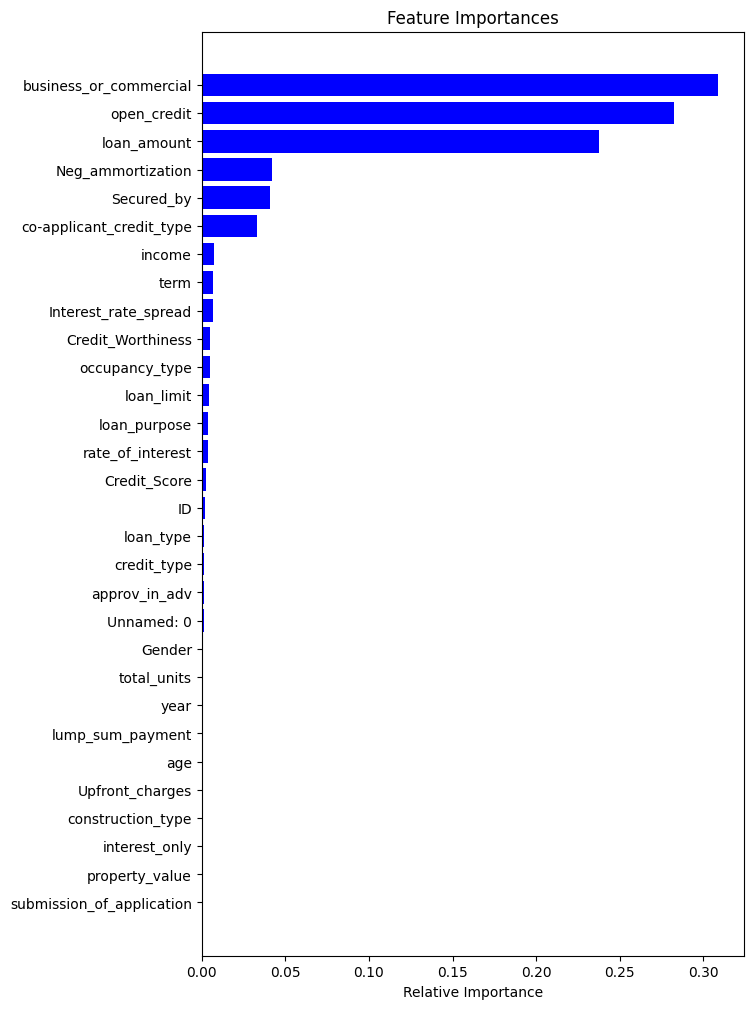

In [15]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Тут застосовується пермутаційний аналіз важливості ознак для моделі наївного Байєса (Gaussian Naive Bayes Classifier). Це дозволяє оцінити вплив кожної ознаки на результати моделі.
За допомогою цього можна побачити, як змінюється якість моделі, якщо ознаки переставити випадковим чином. Це дає розуміння, наскільки кожна з ознак є важливою для правильних прогнозів.
Пермутаційний аналіз важливості вимірює, наскільки погіршується точність моделі, якщо одна ознака переставляється випадково, залишаючи інші без змін. Чим більший вплив перестановки ознаки на результат, тим важливіша ця ознака для моделі. Ознаки також сортуються за важливістю та виводяться у порядку спадання.

In [16]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. business_or_commercial (0.166498)
2. loan_amount (0.140231)
3. open_credit (0.131586)
4. Neg_ammortization (0.005773)
5. Secured_by (0.002596)
6. income (0.002582)
7. Unnamed: 0 (0.002365)
8. Credit_Score (0.002158)
9. co-applicant_credit_type (0.002066)
10. term (0.001420)
11. occupancy_type (0.001360)
12. lump_sum_payment (0.000904)
13. Interest_rate_spread (0.000858)
14. construction_type (0.000678)
15. property_value (0.000207)
16. submission_of_application (0.000207)
17. interest_only (0.000207)
18. loan_type (0.000115)
19. Upfront_charges (0.000041)
20. year (-0.000037)
21. total_units (-0.000069)
22. Gender (-0.000101)
23. credit_type (-0.000124)
24. rate_of_interest (-0.000171)
25. Credit_Worthiness (-0.000175)
26. age (-0.000198)
27. loan_limit (-0.000226)
28. approv_in_adv (-0.000267)
29. loan_purpose (-0.000277)
30. ID (-0.000420)


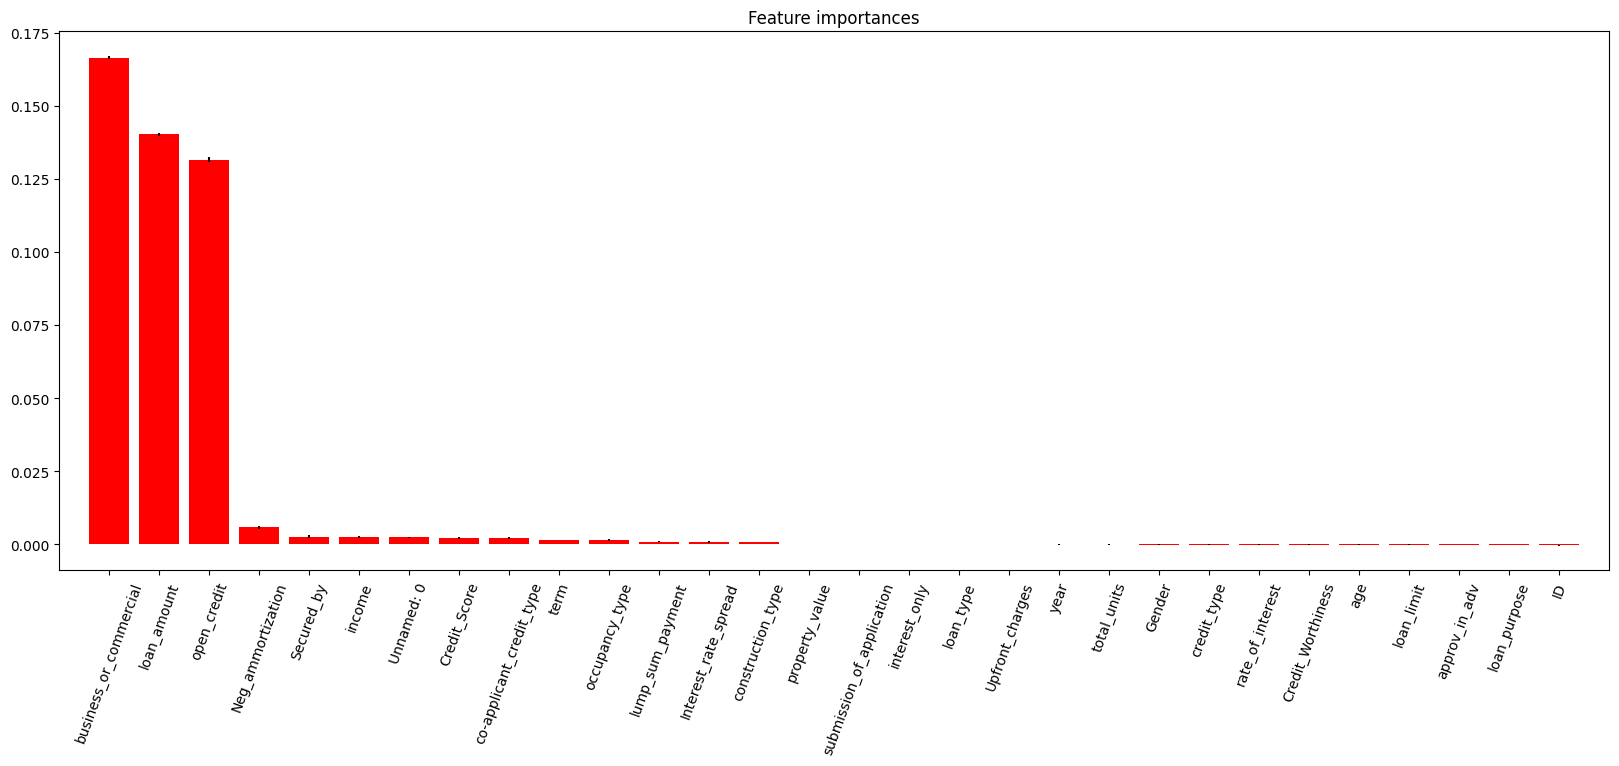

In [17]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()